<a href="https://colab.research.google.com/github/veersubandh/DS1002-S24/blob/main/06_Pandas_exercises_Veer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This assignment was decidedly quicker but I think that pandas are generally easier to use as a library than just base python. The longest amount of time came in trying to figure out how to iterate through with a dictionary while also storing corellations (.corr()) in an efficient manner.

## Pandas exercises 1

1. Import dependencies

In [ ]:
import pandas as pd

---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [ ]:
pdlist = pd.Series(list)

3. Take the above series and add an index that starts at 2 and steps by 3

In [ ]:
index = range(2, len(list) * 3 + 2, 3)

# Converting to Pandas Series
pdlist = pd.Series(list)
pdlist = pdlist.set_axis(index)

# Printing the Series
print(pdlist)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [ ]:
dictionary = {
    'Name': ['Alice', 'Bernice', 'Charley', 'Dominic'],
    'Age': [26, 34, 32, 38],
    'Career': ['Biologist', 'Architect', 'Police Officer', 'Chef']
}

# Convert dictionary to a DataFrame variable type
df = pd.DataFrame(dictionary)

# Print the DataFrame values
print(df)

      Name  Age          Career
0    Alice   26       Biologist
1  Bernice   34       Architect
2  Charley   32  Police Officer
3  Dominic   38            Chef


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [ ]:
df.index.name = 'participant_id'
print(df)

                   Name  Age          Career
participant_id                              
0                 Alice   26       Biologist
1               Bernice   34       Architect
2               Charley   32  Police Officer
3               Dominic   38            Chef


6. Use a pandas function to determine the data types of the columns of `df`.

In [ ]:
print(df.dtypes)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [ ]:
print(df['Name'])

participant_id
0      Alice
1    Bernice
2    Charley
3    Dominic
Name: Name, dtype: object


8. Using dot notation, reference column `name`

In [ ]:
print(df.Name)

participant_id
0      Alice
1    Bernice
2    Charley
3    Dominic
Name: Name, dtype: object


8. Reference column `name` and have it returned in a dataframe.

In [ ]:
print(df[['Name']])

                   Name
participant_id         
0                 Alice
1               Bernice
2               Charley
3               Dominic


9. Show the 3rd element in column `career`.

In [ ]:
print(df.Career[2])

Police Officer


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [ ]:
print(iris.sepal_length.corr(iris.sepal_width))

-0.11756978413300208


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [ ]:
# Get unique species
unique_species = iris['species'].unique()

# Create a dictionary to store correlation values for each species
correlation_dict = {}

# Calculate correlation for each species
for species in unique_species: # Groups the relevant species together
    subset = iris[iris['species'] == species]
    correlation = subset['sepal_length'].corr(subset['sepal_width']) # Actual calculation
    correlation_dict[species] = correlation

print("Top three correlated species:", correlation_dict)

Top three correlated species: {'setosa': 0.7425466856651597, 'versicolor': 0.5259107172828243, 'virginica': 0.4572278163941129}


Setosa has the greatest correlation of around .7425

13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [ ]:
# Initialize a dictionary to store pairs of variables with lowest correlation for each species
lowest_corr_pairs = {}

# Iterate over each species
for species in unique_species:
    subset = iris[iris['species'] == species]
    # Calculate correlation coefficients for all pairs of variables, excluding 'species' column
    correlations = subset.drop('species', axis=1).corr()
    # Find the variable pairs with the lowest correlation
    min_correlation = correlations.unstack().sort_values().head(1)
    lowest_corr_pairs[species] = (min_correlation.index[0], min_correlation.values[0])

# Print the species and their corresponding pairs of variables with the lowest correlation
for species, (var1, correlation) in lowest_corr_pairs.items():
    print(f"For {species}, the pair of variables with the lowest correlation is {var1} with a correlation of {correlation:.2f}.")

For setosa, the pair of variables with the lowest correlation is ('sepal_width', 'petal_length') with a correlation of 0.18.
For versicolor, the pair of variables with the lowest correlation is ('sepal_length', 'sepal_width') with a correlation of 0.53.
For virginica, the pair of variables with the lowest correlation is ('sepal_length', 'petal_width') with a correlation of 0.28.


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


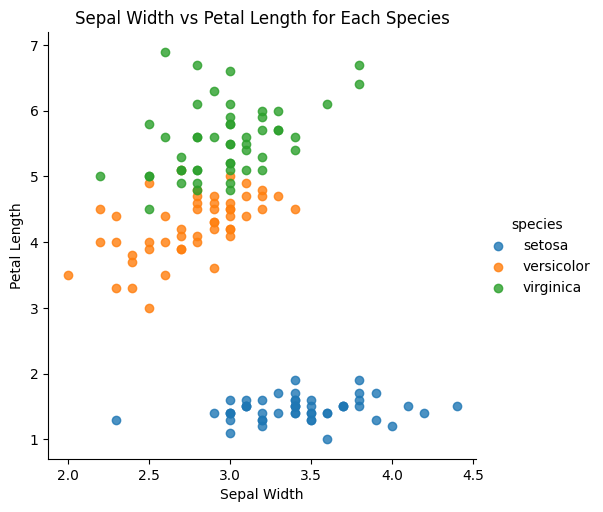

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots for each species
sns.lmplot(x='sepal_width', y='petal_length', data=iris, hue='species', fit_reg=False)
plt.title('Sepal Width vs Petal Length for Each Species')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.show()

The correlation for setosa is extremely low, but what makes the corellation negative overall is that fact that the values for petal length are so low in setosa while the sepal width is so high. This would draw down the trend line from versicolor and virginica which have high petal length and low sepal width, even if their corellation is stronger than in setosa.